<a href="https://colab.research.google.com/github/AndyAlyf/deepLearning_hompimpa/blob/master/DeepLearning_hompimpa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop as optimizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator as imageGenerator
import zipfile,os
import numpy as np
import datetime
import time
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


## Import and preprocessing data

### Proses mendownload dataset

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip\
  -O rockpaperscissors.zip

--2020-05-10 09:19:32--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  26.5MB/s    in 11s     

2020-05-10 09:19:43 (28.3 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



### Ekstraksi Dataset

In [0]:
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('')
zip_ref.close()

In [4]:
os.listdir('rockpaperscissors/rps-cv-images')

['README_rpc-cv-images.txt', 'paper', 'scissors', 'rock']

In [0]:
os.remove('rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt') #Menghapus file yang tidak dibutuhkan

In [6]:
os.listdir('rockpaperscissors/rps-cv-images')

['paper', 'scissors', 'rock']

## Preprocessing dataset

In [0]:
direktori = 'rockpaperscissors/rps-cv-images' #direktoro dataset

In [0]:
#Image generator untuk preprocessing image/gambar
datagen = imageGenerator( 
                rescale=1./255, 
                rotation_range=20,
                horizontal_flip=True,
                shear_range = 0.2,
                fill_mode = 'nearest',
                validation_split = 0.2)  #Membagi dataset untuk train dan valuasi sebesar 4 : 1

In [9]:
train_data = datagen.flow_from_directory(
    direktori,
    target_size = (100,150), #Disesuaikan dengan resolusi gambar dataset dari 300x200 pixel
    batch_size=32,
    color_mode="grayscale", #mengubah gambar menjadi hitam putih agar dapat diimplementasikan pada gambar lain
    class_mode = 'categorical', #Categorical karena lebih dari 2 kelas
    shuffle=True, #Mengacak dataset
)

validasi_data = datagen.flow_from_directory(
    direktori,
    target_size=(100,150), #Disesuaikan dengan resolusi gambar dataset dari 300x200 pixel
    batch_size=32,
    color_mode="grayscale", #mengubah gambar menjadi hitam putih agar dapat diimplementasikan pada gambar lain
    class_mode='categorical', #Categorical karena lebih dari 2 kelas
    shuffle=False,
    subset = 'validation' #validasi_data berasal dari subset validation yang telah dibagi di train_data
)

Found 2188 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


## Modelling

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 1)), #Input shape disesikan dari dataset
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') #Menggunakan 3 percepteron sebagai output
])

model.compile(loss='categorical_crossentropy', #Menggunaakn loss function categorical_crossentropy karena lebih dari 2 label
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

## Training Model

In [11]:
print("waktu mulai training : ",datetime.datetime.now()) 
print()
waktu = (time.localtime().tm_hour)*60+time.localtime().tm_min
model.fit(
      train_data,
      steps_per_epoch=25,  
      epochs=10,
      validation_data=validasi_data, 
      validation_steps=50,  
      verbose=2)
print()
waktu_now = (time.localtime().tm_hour)*60+time.localtime().tm_min
print("waktu selesai training : ",datetime.datetime.now()) 
print("Lama training  : ",waktu_now - waktu,"menit") #Memprint lama waktu training

waktu mulai training :  2020-05-10 09:19:50.148320

Epoch 1/10
25/25 - 35s - loss: 1.0488 - accuracy: 0.4238 - val_loss: 0.8914 - val_accuracy: 0.6158
Epoch 2/10
25/25 - 35s - loss: 0.7525 - accuracy: 0.6538 - val_loss: 0.6359 - val_accuracy: 0.7892
Epoch 3/10
25/25 - 35s - loss: 0.5850 - accuracy: 0.7564 - val_loss: 0.4439 - val_accuracy: 0.8539
Epoch 4/10
25/25 - 35s - loss: 0.4148 - accuracy: 0.8338 - val_loss: 0.5228 - val_accuracy: 0.7866
Epoch 5/10
25/25 - 35s - loss: 0.4702 - accuracy: 0.8263 - val_loss: 0.2605 - val_accuracy: 0.9254
Epoch 6/10
25/25 - 34s - loss: 0.2848 - accuracy: 0.9103 - val_loss: 0.2608 - val_accuracy: 0.9183
Epoch 7/10
25/25 - 35s - loss: 0.2380 - accuracy: 0.9187 - val_loss: 0.2164 - val_accuracy: 0.9235
Epoch 8/10
25/25 - 34s - loss: 0.1681 - accuracy: 0.9463 - val_loss: 0.2301 - val_accuracy: 0.9145
Epoch 9/10
25/25 - 34s - loss: 0.2050 - accuracy: 0.9308 - val_loss: 0.1286 - val_accuracy: 0.9560
Epoch 10/10
25/25 - 35s - loss: 0.1148 - accuracy: 0.9638

AKURASI MODEL TRAIN = 96.38%

AKURASI MODEL VALIDASI = 95.89%

## File Upload

Saving 2E8j595xseKRF60J.png to 2E8j595xseKRF60J.png
2E8j595xseKRF60J.png

Gambar adalah GUNTING / SCISSORS


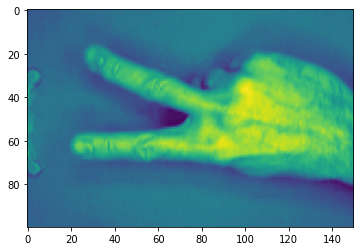

In [16]:
uploaded = files.upload()
 
for i in uploaded.keys():
    img = image.load_img(i, target_size=(100,150), color_mode='grayscale')
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    plt.imshow(img)
    
    images = np.vstack([x])
    kelas = model.predict(images, batch_size=32)
    
    print(i)
    print()
    if (kelas[0][0]==0):
        if (kelas[0][1]==0):
            print("Gambar adalah GUNTING / SCISSORS")
        else:
            print("Gambar adalah BATU / ROCK")
    else:
        print("Gambar adalah KERTAS / PAPER")